In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app

# Deep Learning libraries 
import tensorflow as tf
import PIL as  pil 
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras_preprocessing.image import ImageDataGenerator, load_img

import os
import tensorflow as tf; print(tf.__version__)
print(keras.__version__)

print(os.listdir("data/stanford-car-dataset-by-classes-folder"))

c:\users\alisher\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1
2.2.4
['anno_test.csv', 'anno_train.csv', 'car_data', 'names.csv']


Using TensorFlow backend.


# DATA REVIEW

In [2]:
names = pd.read_csv("data/stanford-car-dataset-by-classes-folder/names.csv")
names.sample(5)

AM General Hummer SUV 2000
133  Hyundai Elantra Sedan 2007
184     Toyota Sequoia SUV 2012
180   Suzuki Kizashi Sedan 2012
21           Audi S4 Sedan 2012
82     Dodge Caliber Wagon 2007

In [3]:
anno_train = pd.read_csv("data/stanford-car-dataset-by-classes-folder/anno_train.csv")
anno_train.sample(5)
# anno_train.describe()

00001.jpg  39  116  569  375   14
1159  01161.jpg  64  106  399  307   82
7114  07116.jpg  81  189  769  427   57
4417  04419.jpg  14   59  408  290  117
6585  06587.jpg  25   53  238  167   53
3536  03538.jpg   4   98  496  322   36

In [4]:
car_test= "data/stanford-car-dataset-by-classes-folder/car_data/car_data/test/"

In [5]:
car_train = "data/stanford-car-dataset-by-classes-folder/car_data/car_data/train/"
print('There are', len(os.listdir(car_train)),'folders in the training dataset')

There are 196 folders in the training dataset


In [6]:
car_test = "data/stanford-car-dataset-by-classes-folder/car_data/car_data/test/"
os.listdir(car_test)

['Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'AM General Hummer SUV 2000',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental Flying Spur Sedan 2007',
 'Bentley Continental GT Coupe 2007',
 'Bentley Continental GT Coupe 2012',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Bentley Mulsanne Sedan 2011',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',


# Convolutional NN 

In [7]:
model = Sequential()

#Convolution 
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# 2nd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

#3rd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

#4rd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

#5rd Convolution
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))


# Flatten the layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(activation = 'relu', units = 256))
model.add(Dense(activation = 'relu', units = 256))
model.add(Dense(activation = 'relu', units = 256))
model.add(Dense(activation = 'sigmoid', units = 196))

# Compile the Neural network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)  

In [22]:
from utils import load_weights

load_weights(model, './model.96-0.89.hdf5')
# model = load_model()
# model.load_weights('./model.96-0.89.hdf5')

NameError: name 'model' is not defined

In [8]:
#Data agumentation
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(car_train,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory(car_test,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [13]:
history = model.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=test_data,
                            validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 149s 1s/step - loss: nan - acc: 0.0075 - val_loss: nan - val_acc: 0.0069
Epoch 2/30
100/100 [==============================] - 141s 1s/step - loss: nan - acc: 0.0050 - val_loss: nan - val_acc: 0.0063
Epoch 3/30
100/100 [==============================] - 142s 1s/step - loss: nan - acc: 0.0041 - val_loss: nan - val_acc: 0.0013
Epoch 4/30
100/100 [==============================] - 139s 1s/step - loss: nan - acc: 0.0075 - val_loss: nan - val_acc: 0.0069
Epoch 5/30
100/100 [==============================] - 142s 1s/step - loss: nan - acc: 0.0037 - val_loss: nan - val_acc: 0.0063
Epoch 6/30
100/100 [==============================] - 136s 1s/step - loss: nan - acc: 0.0044 - val_loss: nan - val_acc: 0.0089
Epoch 7/30
100/100 [==============================] - 141s 1s/step - loss: nan - acc: 0.0069 - val_loss: nan - val_acc: 0.0050
Epoch 8/30
100/100 [==============================] - 139s 1s/s

KeyboardInterrupt: 

In [9]:
vals = pd.DataFrame.from_dict(history.history)
vals = pd.concat([pd.Series(range(0,30),name='epochs'),vals],axis=1)
vals.head()

NameError: name 'history' is not defined

In [14]:
import seaborn as sns

sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

In [1]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(16,16))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])
plt.show()

NameError: name 'plt' is not defined

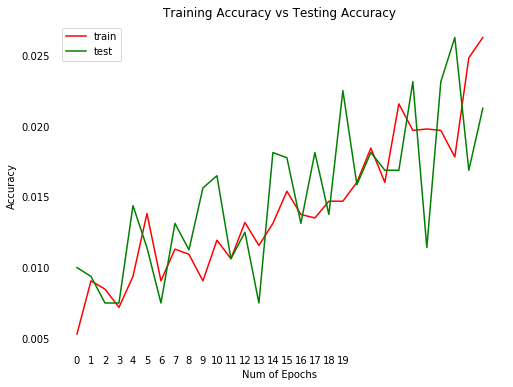

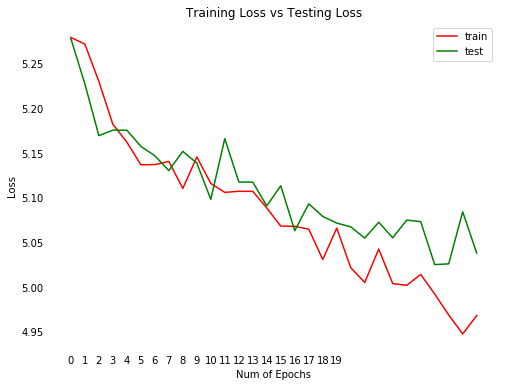

In [25]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Testing Accuracy")
plt.legend(['train','test'])
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Testing Loss")
plt.legend(['train','test'])

 
plt.show()

In [33]:
model.evaluate_generator(test_data, steps=1, max_queue_size=10, workers=1, use_multiprocessing=False) # validation generator

[5.155229568481445, 0.0]

In [36]:
pred = model.predict_generator(test_data, steps=252, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
predicted = np.argmax(pred, axis=1)    # validation generator

252/252 [==============================] - 133s 528ms/step


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image
import csv

In [50]:
class_names = []

with open("data/stanford-car-dataset-by-classes-folder/names.csv") as csvDataFile:
    csvReader = csv.reader(csvDataFile, delimiter=';')
    for row in csvReader:
        class_names.append(row[0])

Confusion Matrix


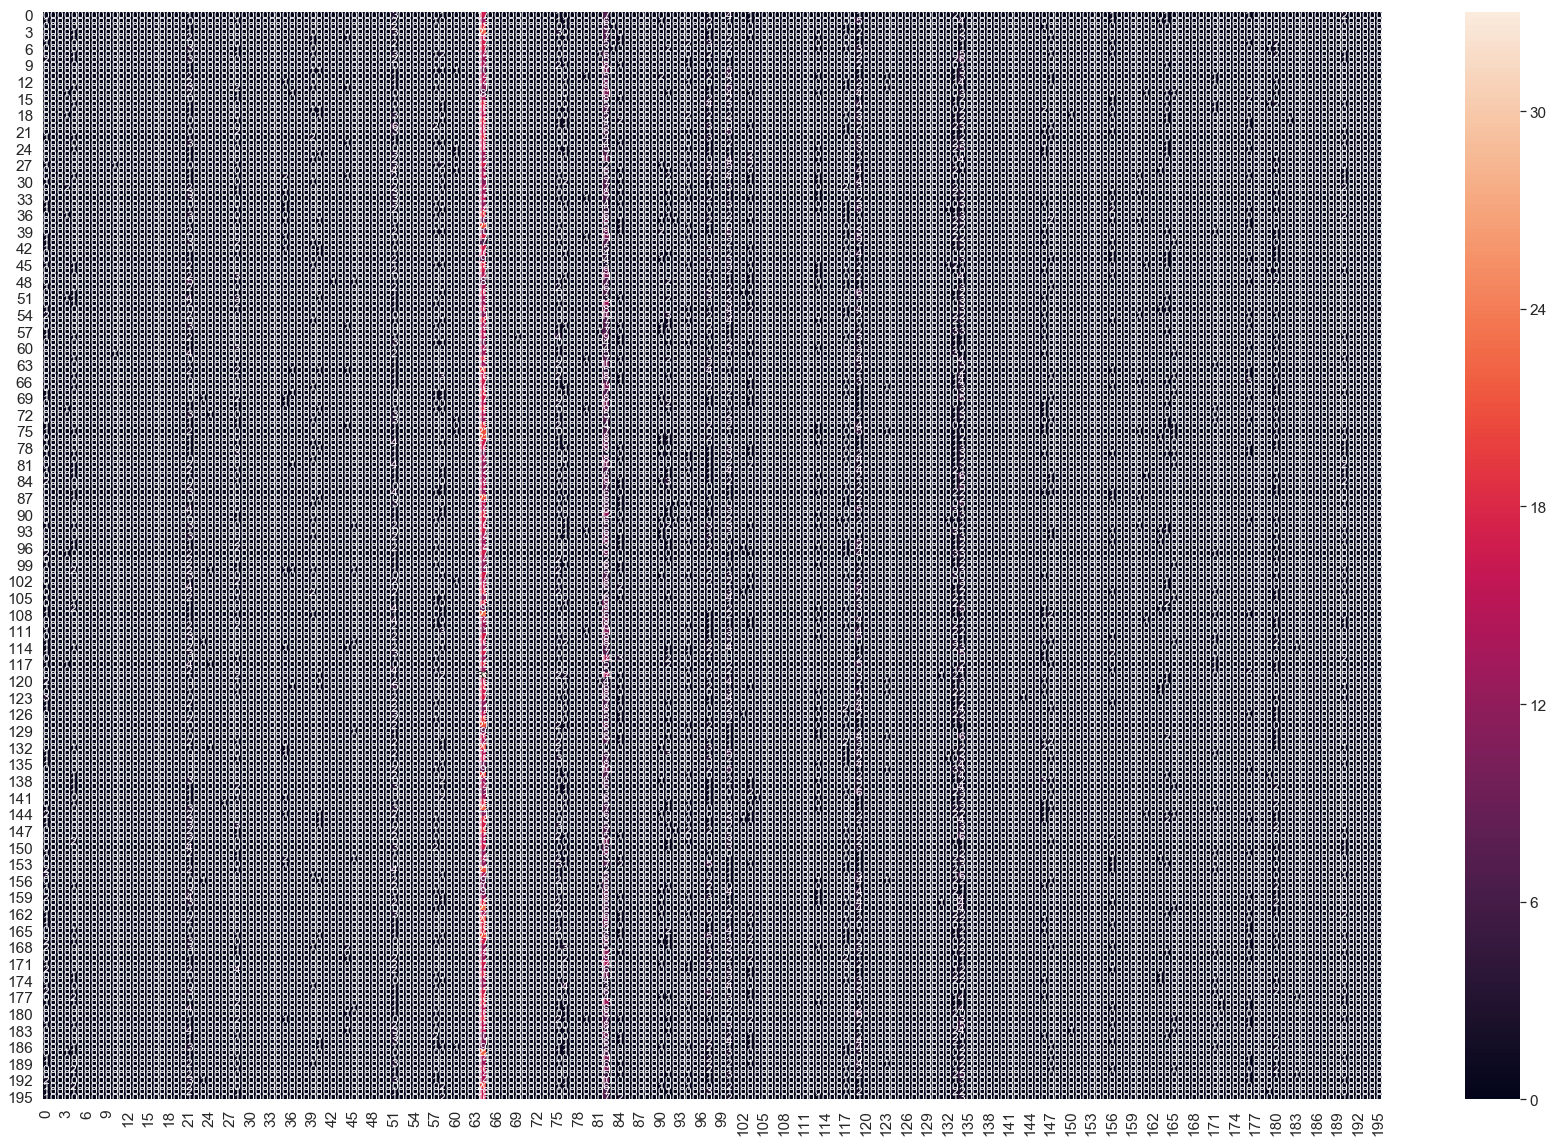


Classification Report
                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.00      0.00      0.00        44
                                   Acura RL Sedan 2012       0.00      0.00      0.00        44
                                   Acura TL Sedan 2012       0.00      0.00      0.00        32
                                  Acura TL Type-S 2008       0.00      0.00      0.00        43
                                  Acura TSX Sedan 2012       0.02      0.02      0.02        42
                             Acura Integra Type R 2001       0.00      0.00      0.00        40
                              Acura ZDX Hatchback 2012       0.00      0.00      0.00        39
              Aston Martin V8 Vantage Convertible 2012       0.00      0.00      0.00        45
                    Aston Martin V8 Vantage Coupe 2012       0.00      0.00      0.00        41
                

c:\users\alisher\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
print('Confusion Matrix')
cm = confusion_matrix(test_data.classes, np.argmax(pred, axis=1))  # validation generator "" test_data
plt.figure(figsize = (30,20))
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
print('Classification Report')
print(classification_report(test_data.classes, predicted, target_names=class_names))
plt.show()

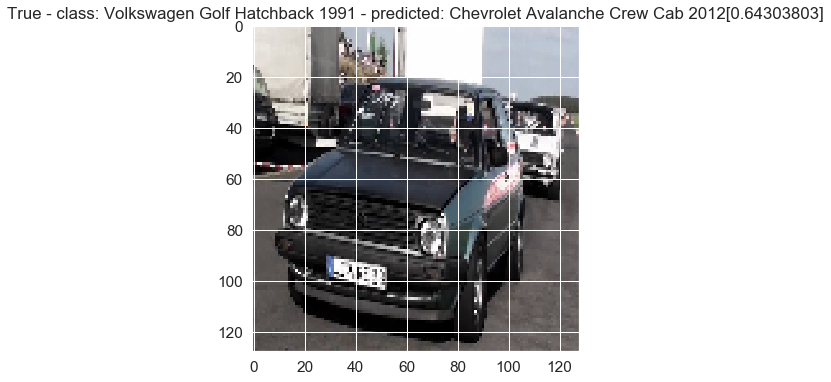

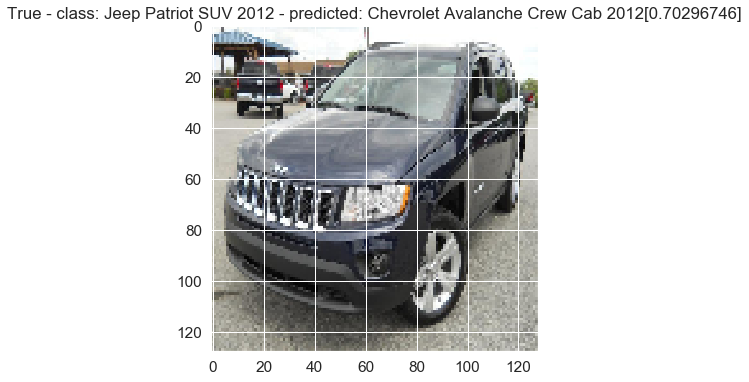

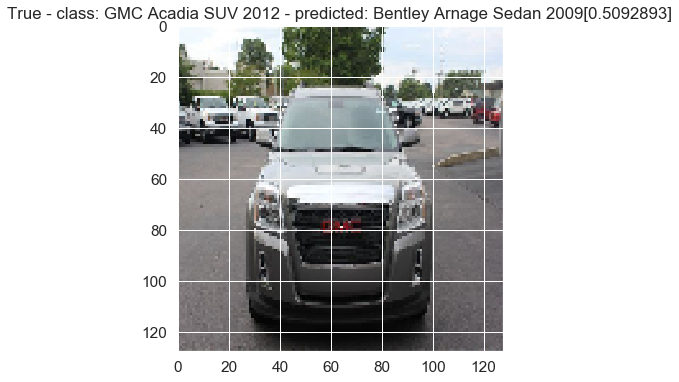

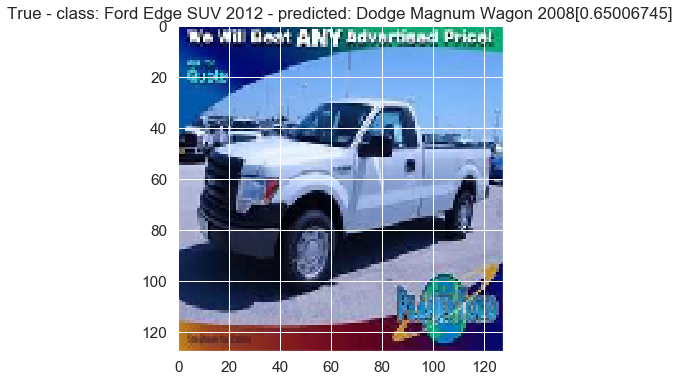

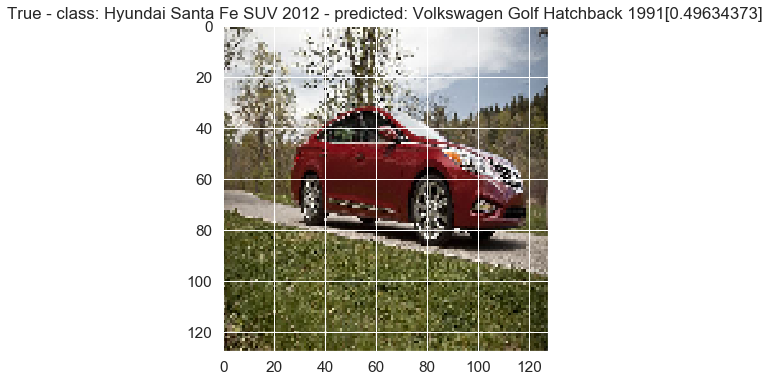

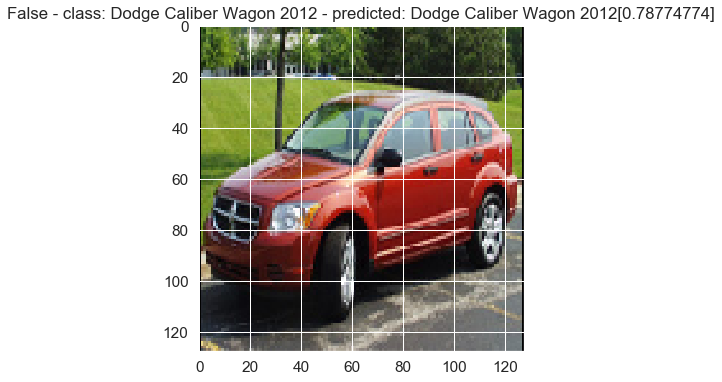

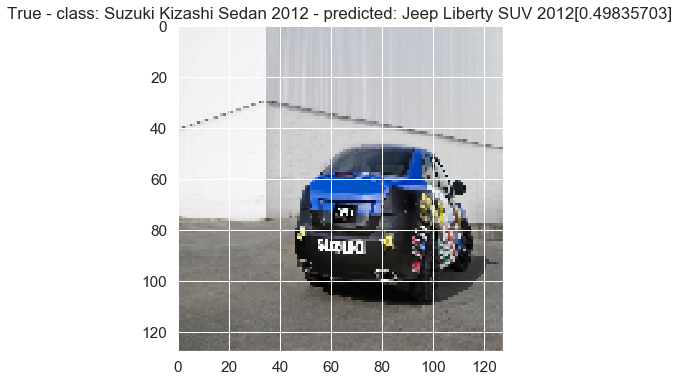

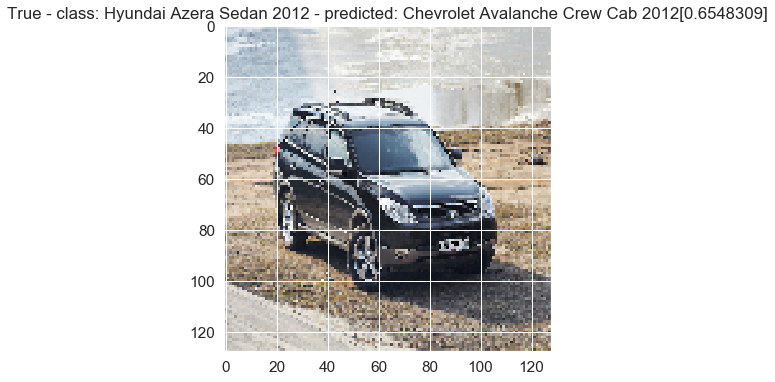

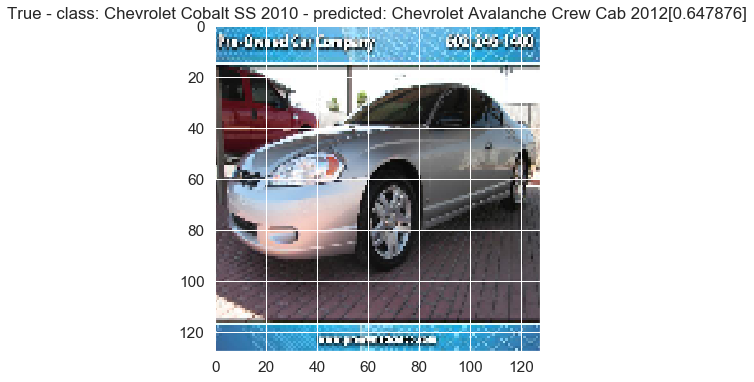

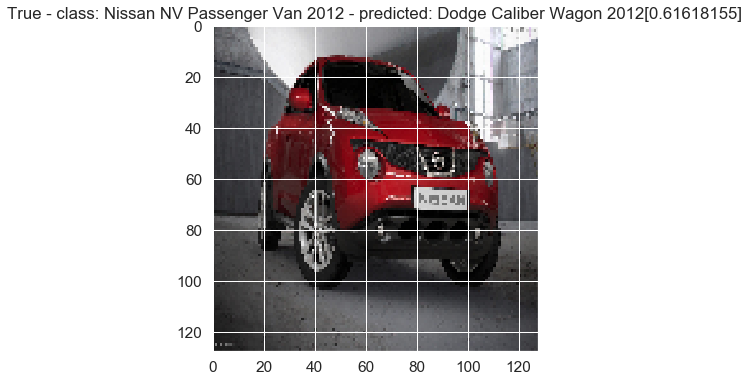

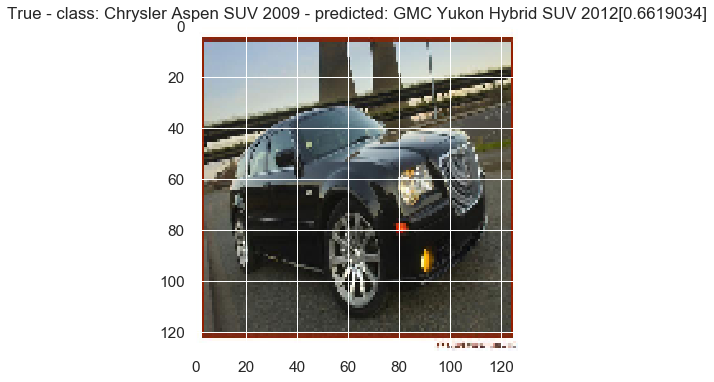

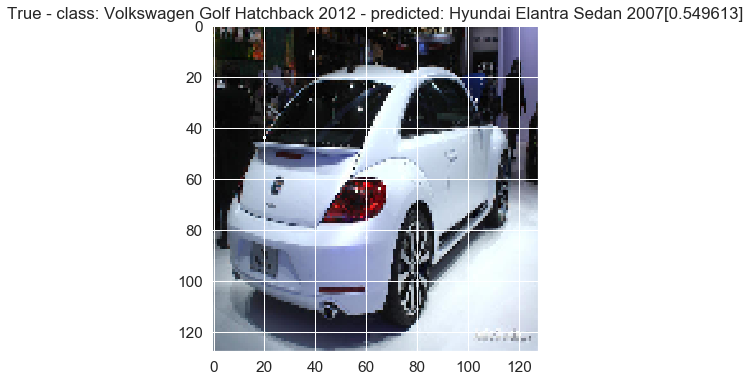

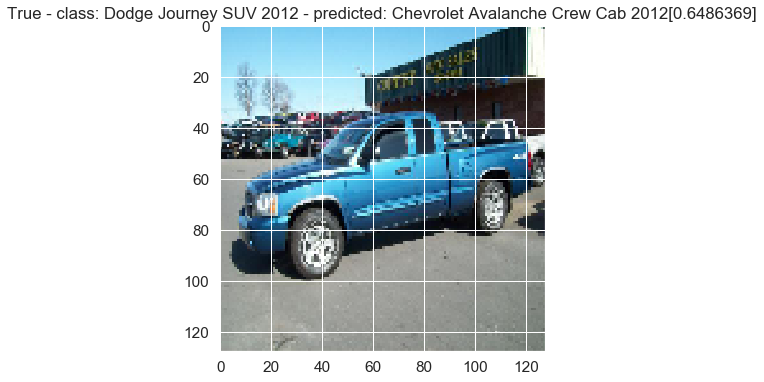

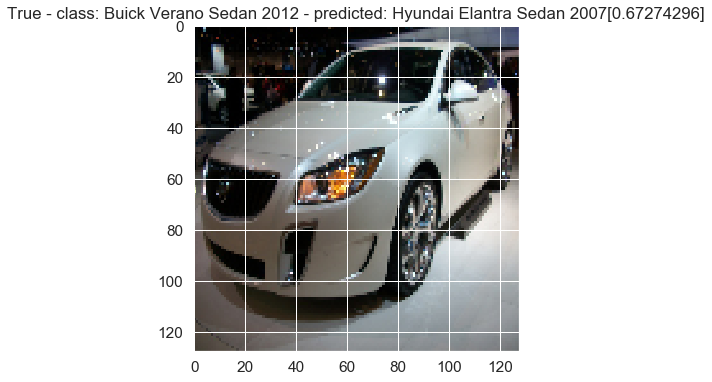

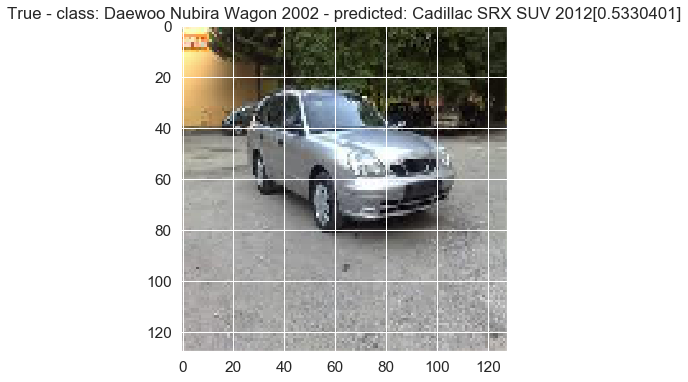

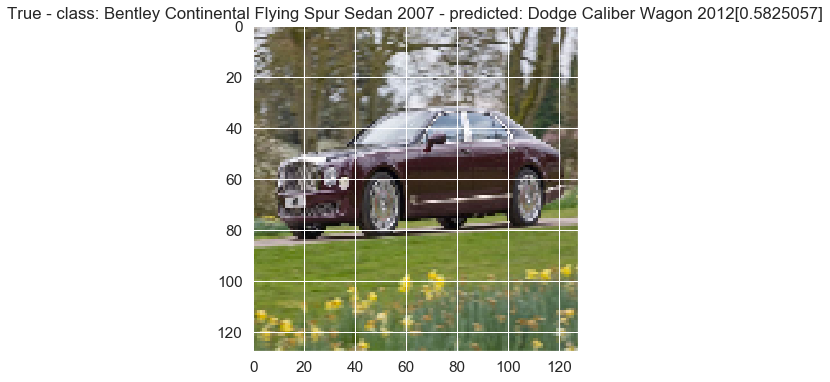

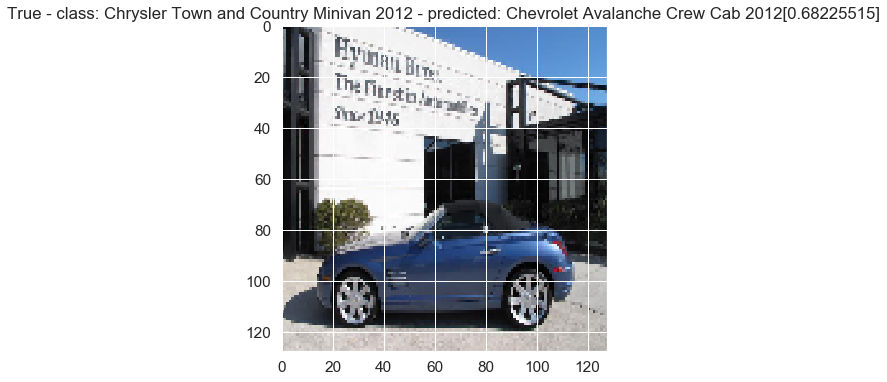

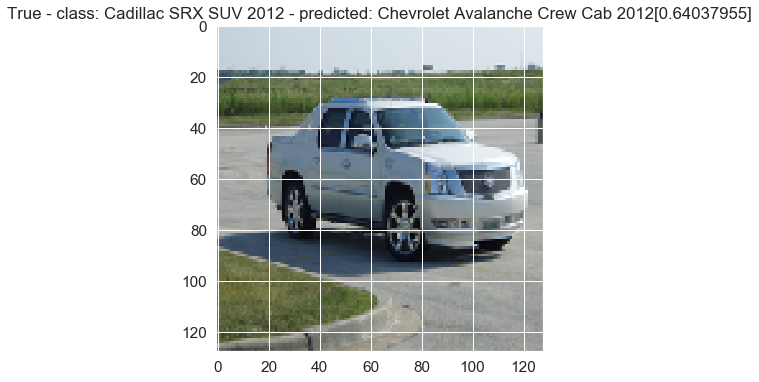

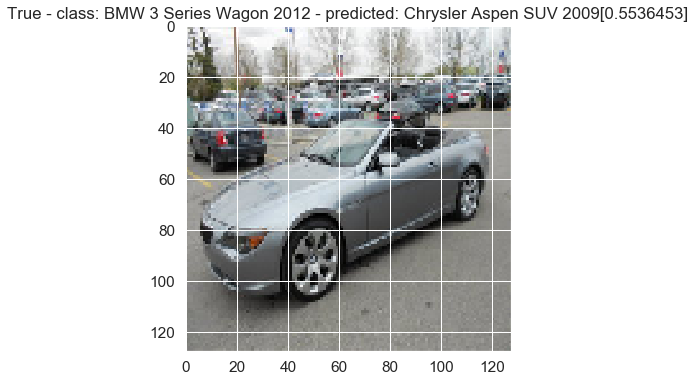

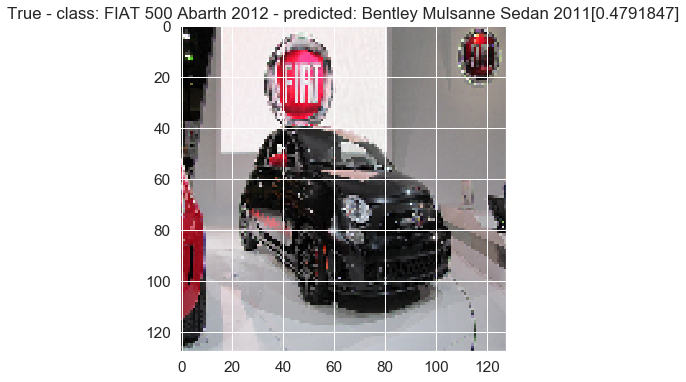

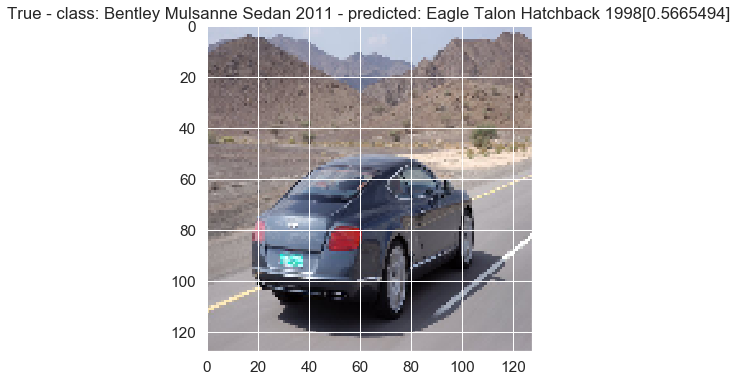

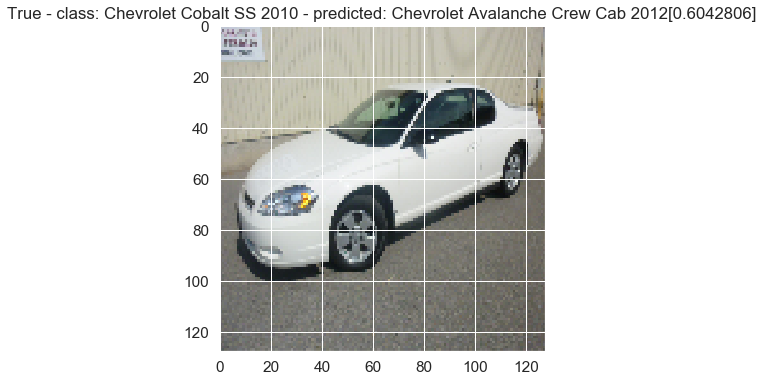

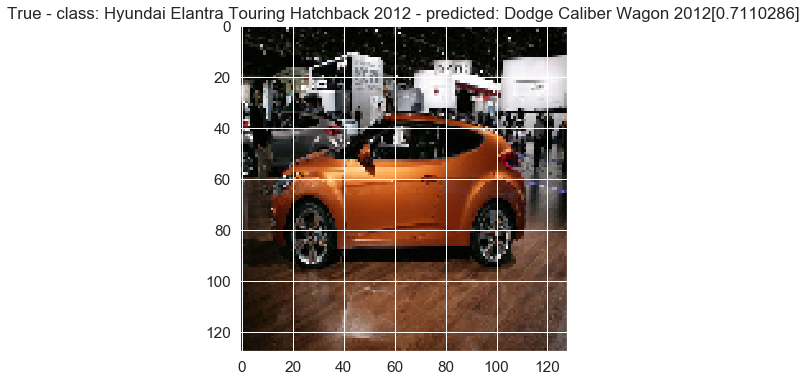

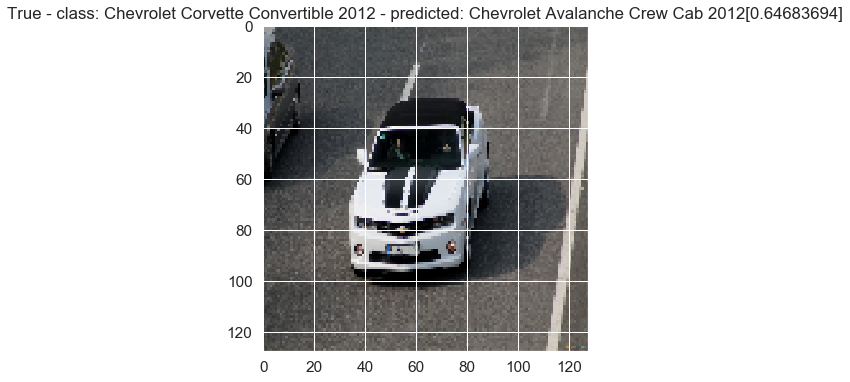

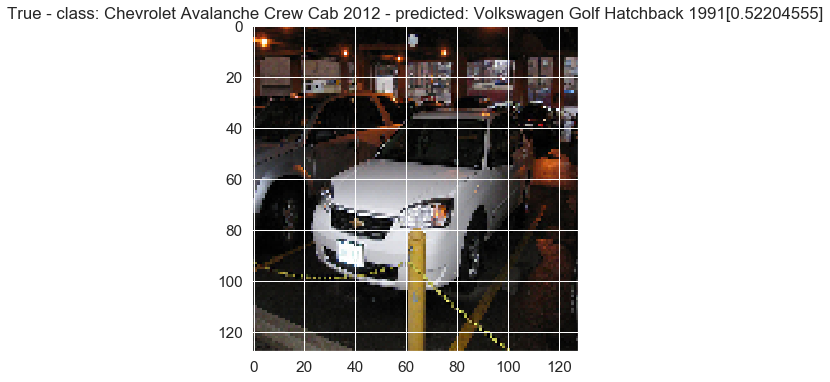

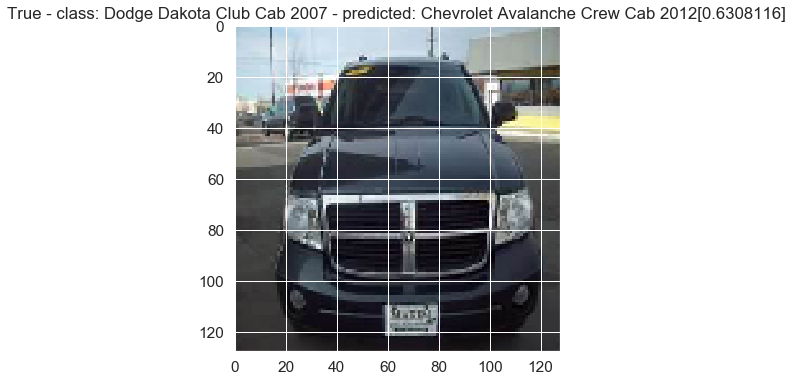

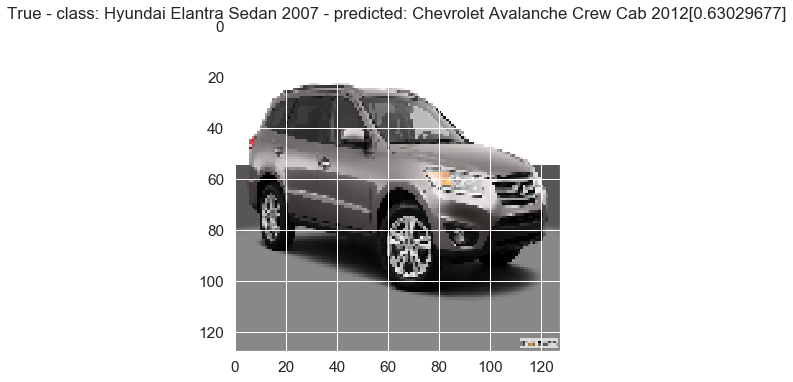

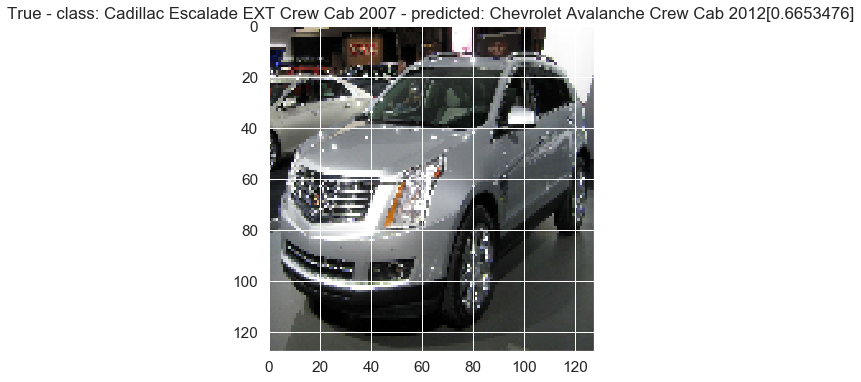

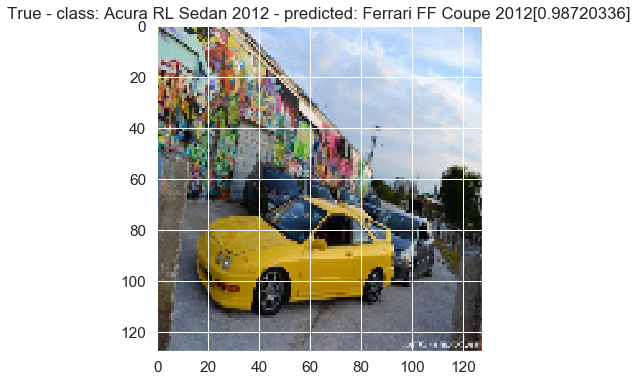

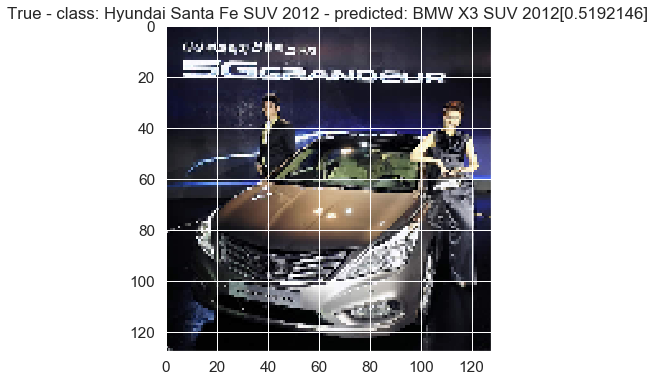

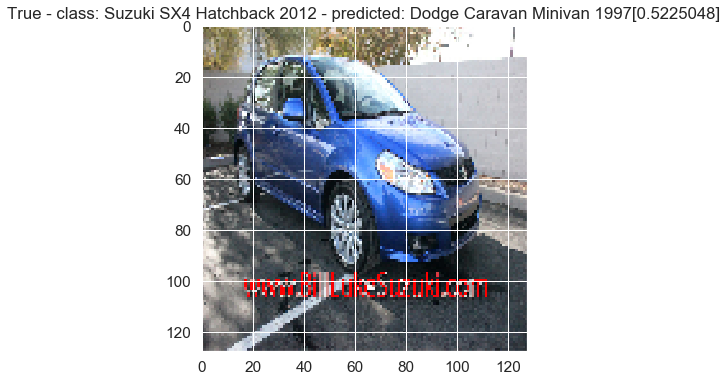

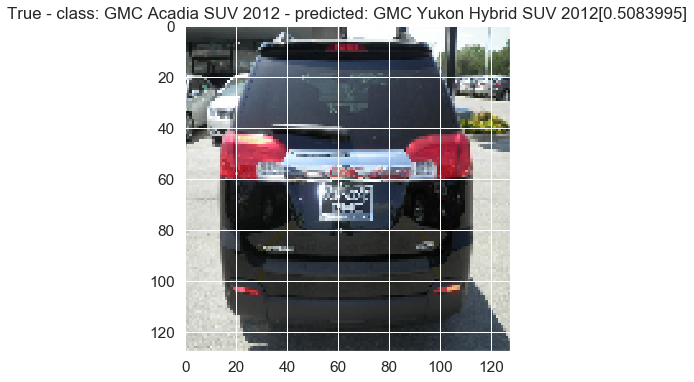

In [56]:
def predict_one(model):
    image_batch, classes_batch = next(test_data)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred != the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)
      plt.show()

predict_one(model)

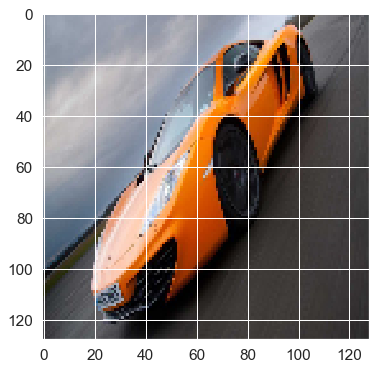

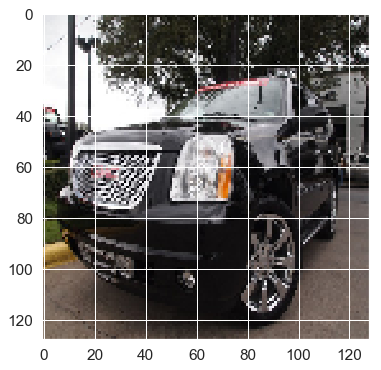

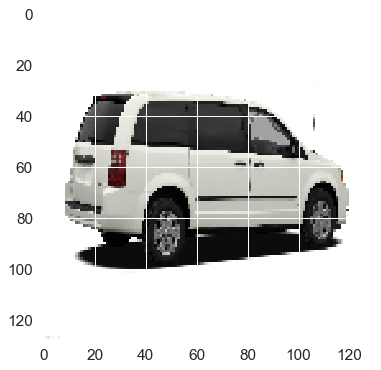

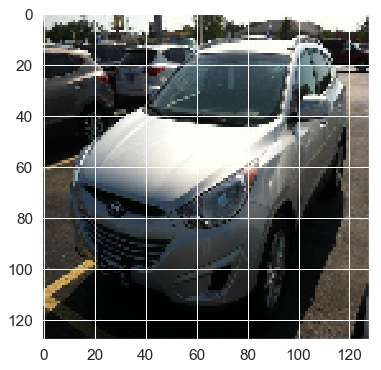

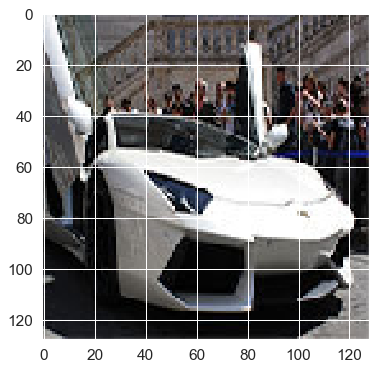

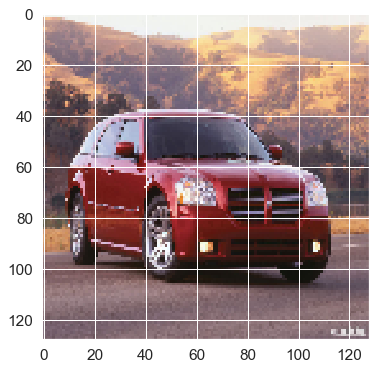

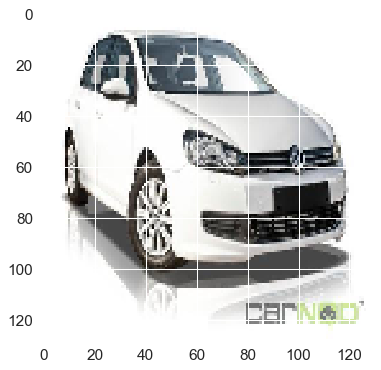

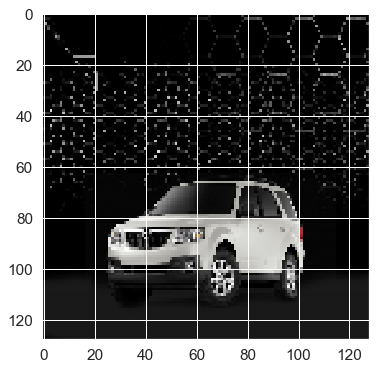

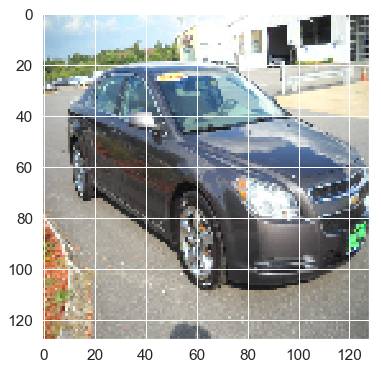

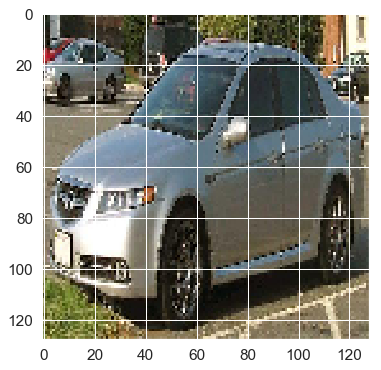

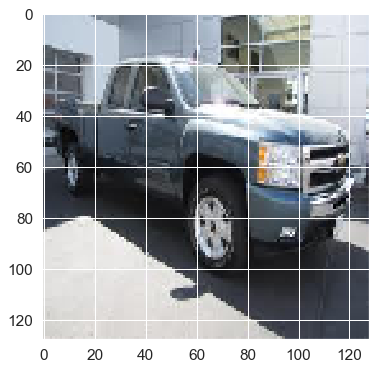

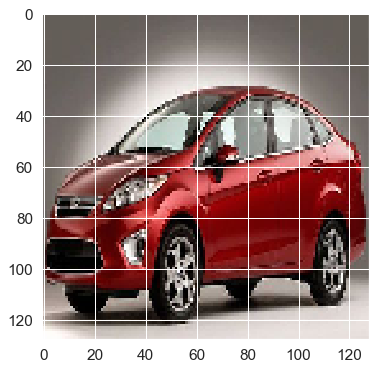

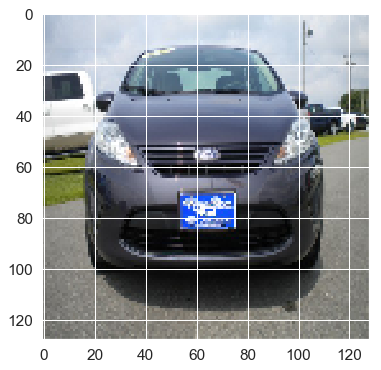

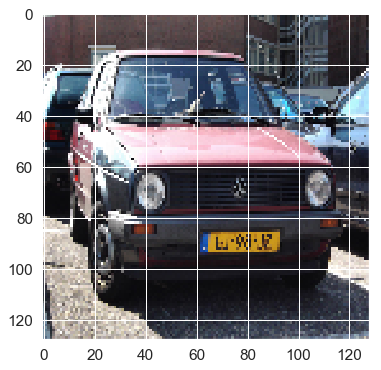

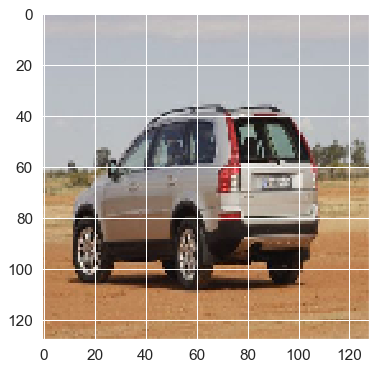

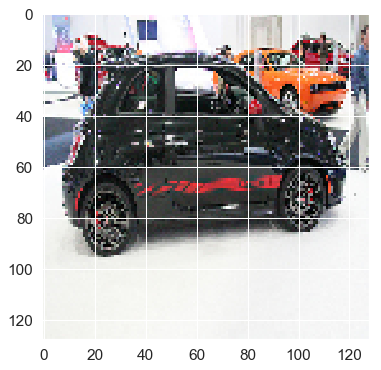

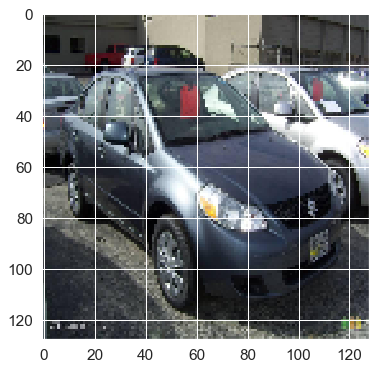

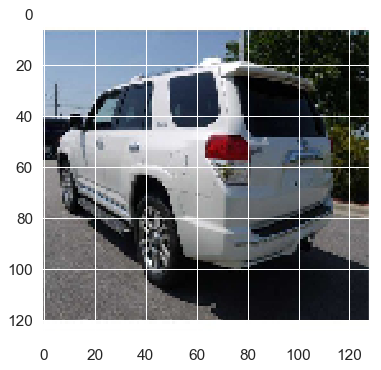

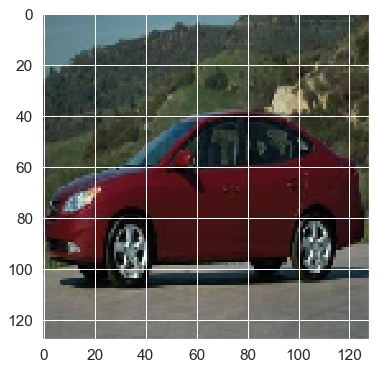

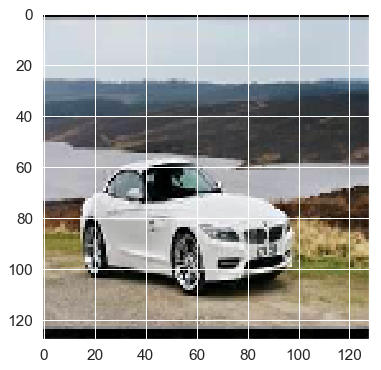

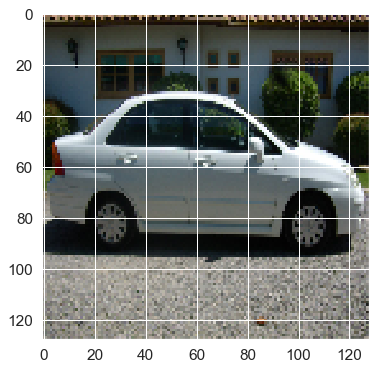

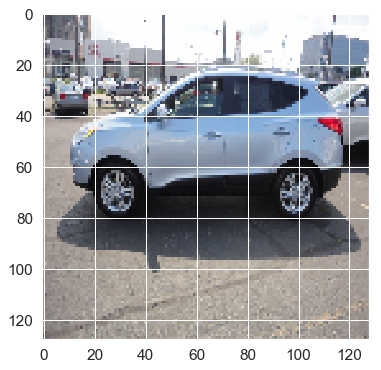

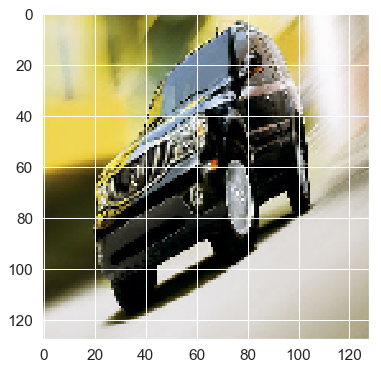

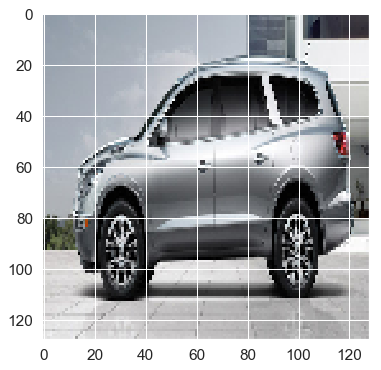

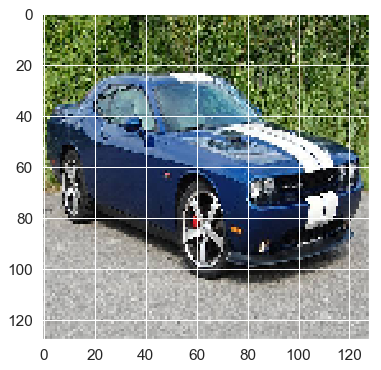

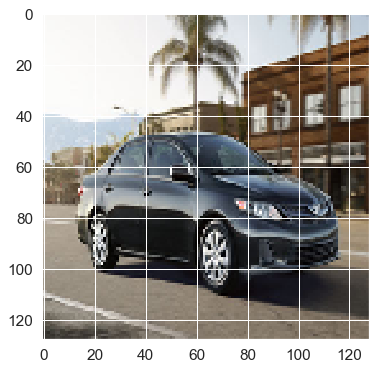

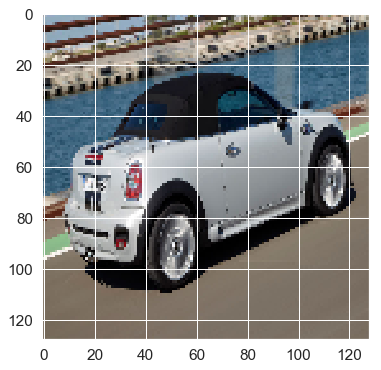

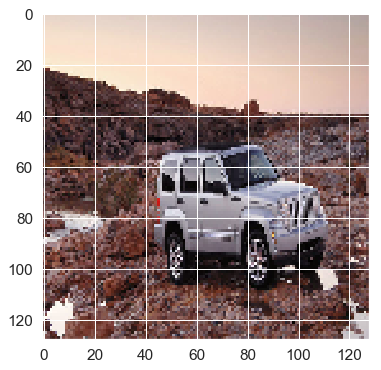

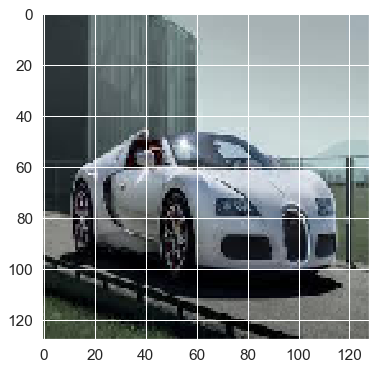

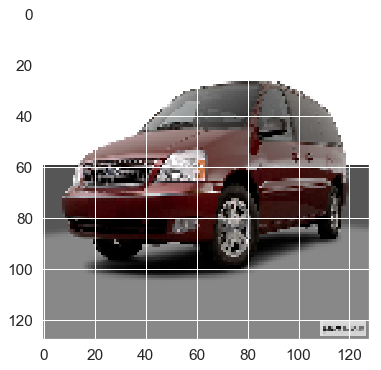

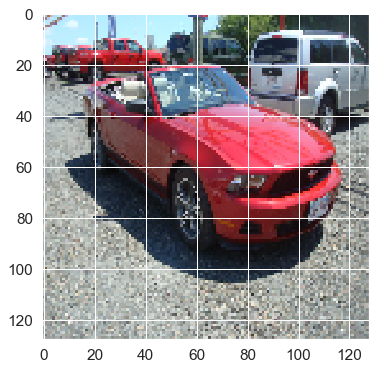

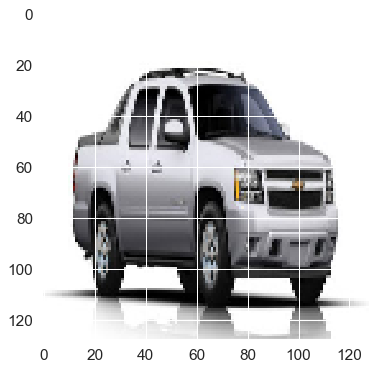

In [57]:
def predict_one(model):
    image_batch, classes_batch = next(test_data)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = class_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = class_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)
      plt.show()

predict_one(model)